<a href="https://colab.research.google.com/github/jattFaizan423/Real-state-Project/blob/main/missing_value_imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('/content/gurgaon_properties_outlier_treated.csv')

In [ ]:
df.head()

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,0,house,independent,sector 43,5.25,27132.0,1935.0,Plot area 215(179.77 sq.m.),4,4,2,2.0,not available,Old Property,NaN,1935.0,NaN,1,1,0,0,0,0,80
1,1,house,international city by sobha phase 1,sector 109,6.10,25103.0,2430.0,Plot area 270(225.75 sq.m.),5,6,3+,2.0,not available,Moderately Old,NaN,2430.0,NaN,0,1,0,0,0,1,30
2,2,flat,unitech sunbreeze,sector 69,0.74,5500.0,1345.0,Super Built up area 1337(124.21 sq.m.),3,3,1,10.0,not available,Under Construction,1337.0,NaN,NaN,0,1,0,0,0,1,60
3,3,flat,pareena mi casa,sector 68,1.90,9227.0,2059.0,Carpet area: 2059 (191.29 sq.m.),3,3,3+,1.0,not available,Under Construction,NaN,NaN,2059.0,0,1,0,0,0,1,49
4,4,flat,godrej nature plus,sector 33,1.40,15124.0,926.0,Super Built up area 145Carpet area: 86 sq.m.,3,2,3+,20.0,not available,New Property,145.0,NaN,86.0,0,0,0,0,0,1,70


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
property_type,0
society,1
sector,0
price,0
price_per_sqft,0
area,0
areaWithType,0
bedRoom,0
bathroom,0


<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

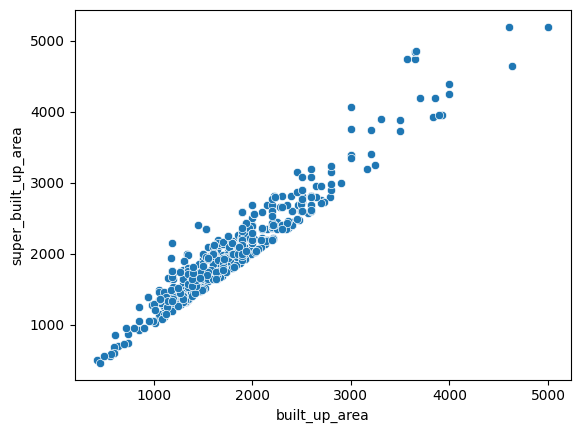

In [ ]:
sns.scatterplot(x=df['built_up_area'], y=df['super_built_up_area'])

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

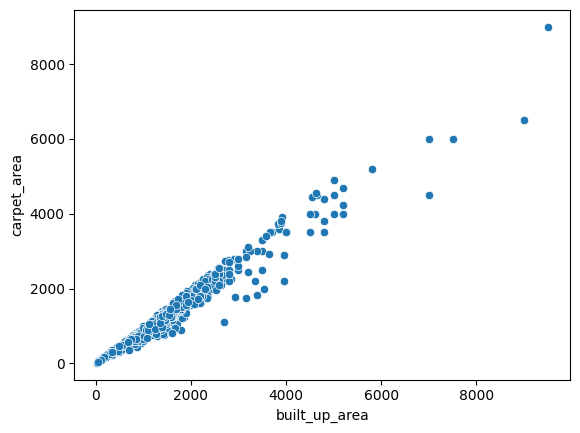

In [ ]:
sns.scatterplot(x=df['built_up_area'],y=df['carpet_area'])

In [ ]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

,0
0,False
1,False
2,False
3,False
4,False
...,...
3581,False
3582,False
3583,False
3584,False


In [ ]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [ ]:
all_present_df.shape

(531, 24)

In [ ]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.105263157894737 0.9


In [ ]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [ ]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)


/tmp/ipython-input-748114042.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)
/tmp/ipython-input-748114042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_

In [ ]:
df.update(sbc_df)

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
property_type,0
society,1
sector,0
price,0
price_per_sqft,0
area,0
areaWithType,0
bedRoom,0
bathroom,0


In [ ]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [ ]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

/tmp/ipython-input-1714170073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)
/tmp/ipython-input-1714170073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)


In [ ]:
df.update(sb_df)

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
property_type,0
society,1
sector,0
price,0
price_per_sqft,0
area,0
areaWithType,0
bedRoom,0
bathroom,0


In [ ]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [ ]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

/tmp/ipython-input-2136919732.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)
/tmp/ipython-input-2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)


In [ ]:

df.update(c_df)

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
property_type,0
society,1
sector,0
price,0
price_per_sqft,0
area,0
areaWithType,0
bedRoom,0
bathroom,0


<Axes: xlabel='built_up_area', ylabel='price'>

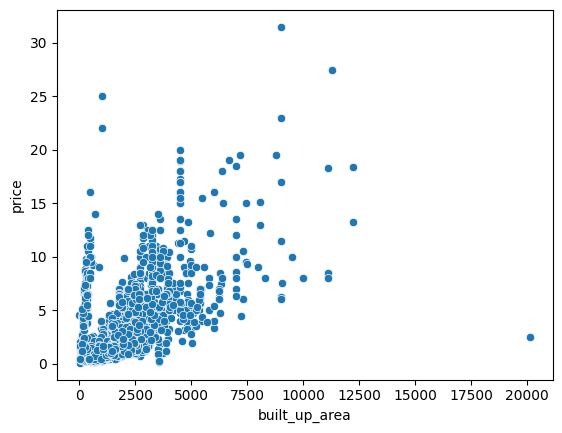

In [ ]:
sns.scatterplot(x = df['built_up_area'],y = df['price'])

In [ ]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]
anamoly_df.sample(5)

,price,area,built_up_area
3522,8.0,4500.0,500.0
1429,3.4,1530.0,1530.0
1589,3.0,1667.0,1654.0
1092,3.2,1800.0,1995.0
2857,3.4,2185.0,1977.0


In [ ]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [ ]:
df.update(anamoly_df)

In [ ]:
df = df[df['built_up_area'] <= 12000]

<Axes: xlabel='built_up_area', ylabel='price'>

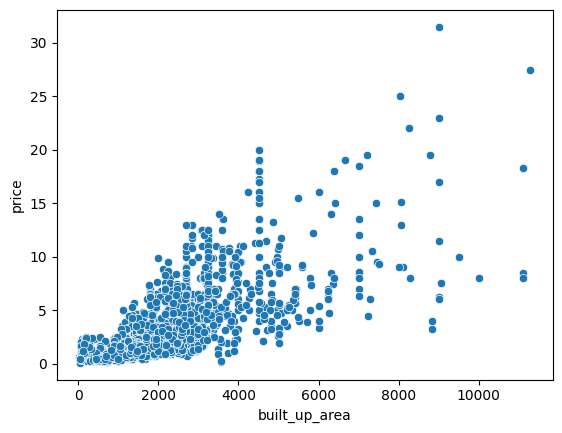

In [ ]:
sns.scatterplot(x = df['built_up_area'],y = df['price'])

In [ ]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area'], inplace=True)

In [ ]:
df.head()

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,0,house,independent,sector 43,5.25,27132.0,4,4,2,2.0,not available,Old Property,1935.0,1,1,0,0,0,0,80
1,1,house,international city by sobha phase 1,sector 109,6.10,25103.0,5,6,3+,2.0,not available,Moderately Old,2430.0,0,1,0,0,0,1,30
2,2,flat,unitech sunbreeze,sector 69,0.74,5500.0,3,3,1,10.0,not available,Under Construction,1210.0,0,1,0,0,0,1,60
3,3,flat,pareena mi casa,sector 68,1.90,9227.0,3,3,3+,1.0,not available,Under Construction,2288.0,0,1,0,0,0,1,49
4,4,flat,godrej nature plus,sector 33,1.40,15124.0,3,2,3+,20.0,not available,New Property,113.0,0,0,0,0,0,1,70


In [ ]:
df[df['floorNum'].isnull()]

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
395,410,house,jacob pura,sector 12,0.35,9722.0,2,1,0,NaN,not available,Old Property,360.0,0,0,0,0,0,1,0
473,491,house,independent,sector 26,4.60,12198.0,4,4,3+,NaN,not available,Old Property,3771.0,0,0,0,0,0,1,28
549,570,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,2,NaN,East,Moderately Old,3240.0,0,1,1,1,0,1,88
577,598,flat,experion heartsong,dwarka expressway,1.08,6150.0,3,3,0,NaN,not available,Under Construction,1758.0,0,0,0,0,0,1,0
726,751,house,independent,sector 4,0.65,11111.0,4,2,2,NaN,not available,Moderately Old,585.0,0,0,0,0,0,1,0
1127,1166,house,independent,sector 7,6.50,15046.0,3,2,3+,NaN,not available,Old Property,4320.0,0,0,0,0,0,1,9
1361,1406,house,ansal sushant lok plots,sector 43,3.30,26570.0,1,1,0,NaN,not available,Under Construction,1242.0,0,0,0,0,0,1,0
1583,1643,flat,NaN,sector 78,0.60,3692.0,2,2,0,NaN,not available,Under Construction,1625.0,0,0,0,0,0,1,0
1611,1674,house,independent,sector 25,13.00,45710.0,6,8,3+,NaN,not available,Relatively New,2844.0,1,1,1,1,0,2,0
1724,1795,house,dlf new town heights,sector 86,2.47,7718.0,4,4,3+,NaN,West,Moderately Old,2800.0,0,1,0,1,0,0,130


In [ ]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [ ]:
df['floorNum'].fillna(2.0,inplace=True)

/tmp/ipython-input-15612474.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0,inplace=True)


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
property_type,0
society,1
sector,0
price,0
price_per_sqft,0
bedRoom,0
bathroom,0
balcony,0
floorNum,0


In [ ]:
df.drop(columns=['facing'],inplace=True)

In [ ]:
df.drop(index=[1583],inplace=True)

In [ ]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1610
New Property,561
Moderately Old,549
Undefined,442
Old Property,297
Under Construction,123


In [ ]:
df[df['agePossession'] == 'Undefined']

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
11,11,flat,whiteland blissville,sector 76,1.92,11794.0,3,3,2,3.0,Undefined,1628.0,0,0,0,0,0,1,61
13,13,flat,ansal height 86,sector 86,0.80,5882.0,2,2,0,1.0,Undefined,1360.0,0,0,0,0,0,1,0
18,19,flat,sare crescent parc,sector 92,0.82,5384.0,3,3,3+,12.0,Undefined,1523.0,0,0,0,0,0,1,0
29,30,flat,emaar mgf emerald floors,sector 65,2.60,15758.0,3,3,3+,3.0,Undefined,1650.0,0,0,0,0,0,1,0
40,41,flat,tulip monsella,sector 53,8.25,28004.0,3,4,3,8.0,Undefined,2661.0,0,1,0,0,0,2,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3557,3770,flat,sidhartha ncr one phase,sector 95,0.46,4646.0,2,2,0,6.0,Undefined,990.0,0,0,0,0,0,1,0
3559,3774,flat,supertech new soft launch,sector 68,0.84,7119.0,2,2,2,7.0,Undefined,1180.0,0,0,0,0,0,1,0
3573,3789,flat,m3m capital,sector 113,2.51,14800.0,3,3,3+,2.0,Undefined,1696.0,1,0,0,0,0,1,49
3581,3797,flat,smart world gems,sector 89,1.13,8500.0,3,3,2,4.0,Undefined,1473.0,1,0,0,0,0,1,115


In [ ]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [ ]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [ ]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1781
New Property,639
Moderately Old,600
Old Property,337
Under Construction,125
Undefined,100


In [ ]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [ ]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [ ]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1800
New Property,665
Moderately Old,607
Old Property,348
Under Construction,125
Undefined,37


In [ ]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [ ]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1812
New Property,665
Moderately Old,632
Old Property,348
Under Construction,125


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
property_type,0
society,0
sector,0
price,0
price_per_sqft,0
bedRoom,0
bathroom,0
balcony,0
floorNum,0


In [ ]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv',index=False)

In [ ]:
df.head()

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,0,house,independent,sector 43,5.25,27132.0,4,4,2,2.0,Old Property,1935.0,1,1,0,0,0,0,80
1,1,house,international city by sobha phase 1,sector 109,6.10,25103.0,5,6,3+,2.0,Moderately Old,2430.0,0,1,0,0,0,1,30
2,2,flat,unitech sunbreeze,sector 69,0.74,5500.0,3,3,1,10.0,Under Construction,1210.0,0,1,0,0,0,1,60
3,3,flat,pareena mi casa,sector 68,1.90,9227.0,3,3,3+,1.0,Under Construction,2288.0,0,1,0,0,0,1,49
4,4,flat,godrej nature plus,sector 33,1.40,15124.0,3,2,3+,20.0,New Property,113.0,0,0,0,0,0,1,70
